In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz

--2022-10-12 09:34:13--  https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz [following]
--2022-10-12 09:34:14--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [application/octet-stream]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M   178MB/s    in 0.2s    

2022-10-12 09:34:14 (178 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"] 

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(1481, 1001)

Then a validation set from the train set:

In [ ]:
#TODO = train_test_split(#TODO)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

Let's hyperparameter gridsearch over different values of `C`:

In [ ]:
from sklearn.metrics import accuracy_score
C_values = np.logspace(-3,3,7)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')

  model = SVC(C = c)
  # Fit on sub-train set
  model.fit(X_train,y_train)
  # Evaluate on val set
  y_pred = model.predict(X_val)
  acc = accuracy_score(y_pred,y_val)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with C=0.001
--> accuracy = 0.06914893617021277
Training SVM with C=0.01
--> accuracy = 0.0851063829787234
Training SVM with C=0.1
--> accuracy = 0.19946808510638298
Training SVM with C=1.0
--> accuracy = 0.4787234042553192
Training SVM with C=10.0
--> accuracy = 0.6808510638297872
Training SVM with C=100.0
--> accuracy = 0.7047872340425532
Training SVM with C=1000.0
--> accuracy = 0.7047872340425532


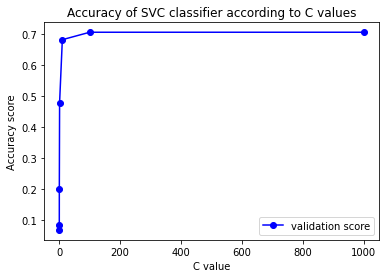

In [ ]:
plt.plot(C_values,accuracies,"-o",color="blue",label="validation score")
plt.gca().set_title("Accuracy of SVC classifier according to C values")
plt.gca().set_xlabel("C value")
plt.gca().set_ylabel("Accuracy score")
plt.legend()
plt.show()

Training SVM with C=0.01
Training SVM with C=0.1
Training SVM with C=1.0
Training SVM with C=10.0
Training SVM with C=100.0
Training SVM with C=1000.0
Training SVM with C=10000.0


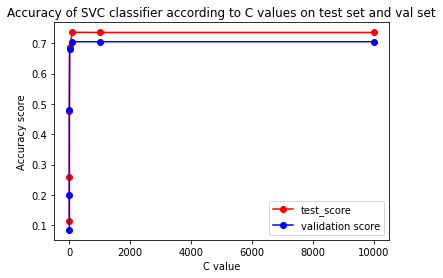

In [ ]:
#TODO Fit on the whole train set, evaluate on the test set 
from sklearn.metrics import accuracy_score
C_values = np.logspace(-2,4,7)
accuracies_val = []
accuracies_test = []

for c in C_values:
  print(f'Training SVM with C={c}')

  model = SVC(C = c)
  # Fit on sub-train set
  model.fit(X_train,y_train)
  
  # Evaluate on val set
  y_pred = model.predict(X_val)
  acc = accuracy_score(y_pred,y_val)
  accuracies_val.append(acc)

  # Evaluate on test set
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_pred,y_test)
  accuracies_test.append(acc)


plt.plot(C_values,accuracies_test,"-o",color="r",label="test_score")
plt.plot(C_values,accuracies_val,"-o",color="b",label="validation score")
plt.gca().set_title("Accuracy of SVC classifier according to C values on test set and val set")
plt.gca().set_xlabel("C value")
plt.gca().set_ylabel("Accuracy score")
plt.legend()
plt.show()

Do the same with different kernel values, and different decision functions:

In [ ]:
# Faire un grid search avec plusieurs paramètres